Import Libraries

In [1641]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score


In [1642]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the dataset

In [1643]:
train_path = "./Datasets/train.csv"
test_path = "./Datasets/test.csv"

mall_train_path = "./Datasets/with_mall_1and2km_train.csv"
mall_test_path = "./Datasets/with_mall_1and2km_test.csv"
mrt_train_path = "./Datasets/mrt_train.csv"
mrt_test_path = "./Datasets/mrt_test.csv"
school_train_path = "./Datasets/with_schoolrank_train.csv"
school_test_path = "./Datasets/with_schoolrank_test.csv"
stock_train_path = "./Datasets/stock_train.csv"
stock_test_path = "./Datasets/stock_test.csv"
coe_train_path = "./Datasets/coe_train.csv"
coe_test_path = "./Datasets/coe_test.csv"
cpi_train_path = "./Datasets/cpi_train.csv"
cpi_test_path = "./Datasets/cpi_test.csv"

school_ranking_path = "./Datasets/schools_ranking.csv"
mall_popular_path = "./Datasets/popular_malls1.csv"
mall_score_path = "./Datasets/mallscores.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

mall_test = pd.read_csv(mall_test_path)
mall_train = pd.read_csv(mall_train_path)
mrt_train = pd.read_csv(mrt_train_path)
mrt_test = pd.read_csv(mrt_test_path)
school_train = pd.read_csv(school_train_path)
school_test = pd.read_csv(school_test_path)
stock_train = pd.read_csv(stock_train_path)
stock_test = pd.read_csv(stock_test_path)
coe_train = pd.read_csv(coe_train_path)
coe_test = pd.read_csv(coe_test_path)
cpi_train = pd.read_csv(cpi_train_path)
cpi_test = pd.read_csv(cpi_test_path)

school_ranking = pd.read_csv(school_ranking_path)
mall_popular = pd.read_csv(mall_popular_path)
mall_score = pd.read_csv(mall_score_path)


In [1644]:
mrt_columns = ['MRT_1km', 'nearest_MRT_dis', 'mrt_average_price', 'BetweennessScore', 'IngressScore']
train_data[mrt_columns] = mrt_train[mrt_columns]
test_data[mrt_columns] = mrt_test[mrt_columns]

school_columns = ['nearest_school_dis', 'nearest_school_name', 'best_school_1km', 'best_school_2km', 'best_school_3km']
train_data[school_columns] = school_train[school_columns]
test_data[school_columns] = school_test[school_columns]

mall_columns = ['nearest_mall_distance', 'nearest_mall_name', 'malls_in_1km', 'malls_in_2km']
train_data[mall_columns] = mall_train[mall_columns]
test_data[mall_columns] = mall_test[mall_columns]

stock_columns = ['stock_price']
train_data[stock_columns] = stock_train[stock_columns]
test_data[stock_columns] = stock_test[stock_columns]

coe_columns = ['coe']
train_data[coe_columns] = coe_train[coe_columns]
test_data[coe_columns] = coe_test[coe_columns]

cpi_columns = ['housingCPI']
train_data[cpi_columns] = cpi_train[cpi_columns]
test_data[cpi_columns] = cpi_test[cpi_columns]


See train data distribution

In [1645]:
train_data.shape

(60000, 33)

In [1646]:
train_data.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,best_school_1km,best_school_2km,best_school_3km,nearest_mall_distance,nearest_mall_name,malls_in_1km,malls_in_2km,stock_price,coe,housingCPI
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,...,Princess Elizabeth Primary School,Princess Elizabeth Primary School,Rulang Primary School,1.197252,Westgate,NaN,West Mall?IMM?JCube?Jem?Westgate,1,165.936383,102.979
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,...,Red Swastika School,Red Swastika School,St. Hilda's Primary School,1.114364,Djitsun Mall Bedok,NaN,Bedok Mall?Djitsun Mall Bedok?Tampines 1,2,457.166955,106.030
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,...,CHIJ Primary (Toa Payoh),Pei Chun Public School,Catholic High School (Primary),0.468813,HDB Hub,Balestier Hill Shopping Centre?HDB Hub?Zhongsh...,Balestier Hill Shopping Centre?HDB Hub?United ...,3,718.847572,106.702
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,...,White Sands Primary School,East Spring Primary School,Chongzheng Primary School,0.400741,Loyang Point,Loyang Point,Downtown East?White Sands?Loyang Point,1,140.586707,102.801
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,...,Hong Wen School,Hong Wen School,Anglo-Chinese School (Junior),1.067395,Aperia,NaN,Aperia?City Square Mall?HDB Hub?Mustafa Shoppi...,4,984.269462,108.770


In [1647]:
train_data.nunique()

rent_approval_date         31
town                       26
block                    2553
street_name              1083
flat_type                   9
flat_model                 19
floor_area_sqm            146
furnished                   1
lease_commence_date        54
latitude                 8612
longitude                8612
elevation                   1
subzone                   152
planning_area              29
region                      5
monthly_rent              113
MRT_1km                    15
nearest_MRT_dis          8630
mrt_average_price          96
BetweennessScore           90
IngressScore                5
nearest_school_dis       8612
nearest_school_name       164
best_school_1km           121
best_school_2km            62
best_school_3km            31
nearest_mall_distance    8610
nearest_mall_name         114
malls_in_1km              297
malls_in_2km              535
stock_price                 4
coe                        31
housingCPI                 31
dtype: int

In [1648]:
train_data.isna().sum()

rent_approval_date           0
town                         0
block                        0
street_name                  0
flat_type                    0
flat_model                   0
floor_area_sqm               0
furnished                    0
lease_commence_date          0
latitude                     0
longitude                    0
elevation                    0
subzone                      0
planning_area                0
region                       0
monthly_rent                 0
MRT_1km                      0
nearest_MRT_dis              0
mrt_average_price            0
BetweennessScore             0
IngressScore                 0
nearest_school_dis           0
nearest_school_name          0
best_school_1km              0
best_school_2km              0
best_school_3km              0
nearest_mall_distance        0
nearest_mall_name            0
malls_in_1km             11223
malls_in_2km               303
stock_price                  0
coe                          0
housingC

Data preprocessing of train_data

In [1649]:
def data_preprocessing(data):
    data.replace("-", " ", regex=True, inplace=True)

    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].str.lower()
    
    data['lease_commence_date'] = 2023 - data['lease_commence_date']

    def convert_to_numeric(date_str):
        year, month = date_str.split(" ")
        return float(year) + float(month)/12.0
    data['rent_approval_date'] = [convert_to_numeric(date) for date in data['rent_approval_date']]

    data['rent_approval_date'] = data['rent_approval_date'] - 2020
    
    # def transform(x):
    #     # return -(x-0.2)**2+1
    #     if x<=0.2:
    #         return x+0.6
    #     else:
    #         return 1-x

    # transform=np.vectorize(transform)
    # data['nearest_MRT_dis']=transform(data['nearest_MRT_dis'])

    data.rename(columns={'best_school_2km': 'School Name'}, inplace=True)
    school_ranking['School Name'] = school_ranking['School Name'].str.lower()
    school_ranking.replace("-", " ", regex=True, inplace=True)
    data = data.merge(school_ranking[['School Name', 'Rank']], on='School Name', how='left')


    mall_popular['name'] = mall_popular['name'].str.lower()
    mall_popular.replace("-", " ", regex=True, inplace=True)
    # data['popular_mall'] = data['nearest_mall_name'].isin(mall_popular['name']).astype('int64')

    def count_popular_malls(malls_string):
        if isinstance(malls_string, str):
            malls_list = malls_string.split('?')
            for mall in malls_list:
                if mall in mall_popular['name'].values:
                    return 1
            return 0
            # return sum([1 for mall in malls_list if mall in mall_popular['name'].values])
            #return len(malls_list)
        else:
            return 0

    data['num_popular_malls'] = data['malls_in_1km'].apply(count_popular_malls) #/ (data['nearest_mall_distance'] + 5)

    data['nearest_mall_distance'] = pd.cut(data['nearest_mall_distance'], bins=[0, 0.5, 1, 2, float('inf')], labels=[4, 3, 2, 1], right=False).astype('int64')


    # def find_mall_score(malls_string):
    #     if isinstance(malls_string, str):
    #         malls_list = malls_string.split('?')
    #         scores = 0
    #         for mall in malls_list:
    #             current_mall_score = mall_score[mall_score['name'] == mall]['GoogleScore']
    #             scores = max(scores, current_mall_score.values[0])
    #         return scores
    #     else:
    #         return 0
    # mall_score['name'] = mall_score['name'].str.lower()
    # mall_score.replace("-", " ", regex=True, inplace=True)

    # data['mall_score'] = data['malls_in_1km'].apply(find_mall_score)
    # data['mall_score'] = pd.cut(data['mall_score'], bins=[0, 4.2, 4.4, float('inf')], labels=[1, 2, 3], right=False).astype('int64')


    # data['Rank'] = data['Rank'].apply(lambda x: x if x <  100 else int(x/10)*10)

    # data['Rank'] = pd.cut(data['Rank'], bins=[0, 5, 10, 20, 30, 50, 80, 120, float('inf')], labels=[7, 6, 5, 4, 3, 2, 1, 0], right=False).astype('int64')
    # data['Rank'] = (data['Rank'] / 10).astype('int64')
    # data = data.drop_duplicates()
    # data = data.reset_index(drop=True)
    # data['monthly_rent'] = np.log1p(data['monthly_rent'])
    # data.drop(data[(data['floor_area_sqm']<30)].index, inplace=True)
    # data.drop(data[(data['floor_area_sqm']>160)].index, inplace=True)
    # data.drop(data[(data['monthly_rent']>6000)].index, inplace=True)
    # data.drop(data[(data['monthly_rent']<500)].index, inplace=True)
    
    return data

train_data = data_preprocessing(train_data)
train_data


,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,...,best_school_3km,nearest_mall_distance,nearest_mall_name,malls_in_1km,malls_in_2km,stock_price,coe,housingCPI,Rank,num_popular_malls
0,1.750000,jurong east,257,jurong east street 24,3 room,new generation,67.0,yes,40,1.344518,...,rulang primary school,2,westgate,NaN,west mall?imm?jcube?jem?westgate,1,165.936383,102.979,43,0
1,2.416667,bedok,119,bedok north road,4 room,new generation,92.0,yes,45,1.330186,...,st. hilda's primary school,2,djitsun mall bedok,NaN,bedok mall?djitsun mall bedok?tampines 1,2,457.166955,106.030,17,0
2,2.833333,toa payoh,157,lorong 1 toa payoh,3 room,improved,67.0,yes,52,1.332242,...,catholic high school (primary),4,hdb hub,balestier hill shopping centre?hdb hub?zhongsh...,balestier hill shopping centre?hdb hub?united ...,3,718.847572,106.702,11,0
3,1.666667,pasir ris,250,pasir ris street 21,executive,apartment,149.0,yes,30,1.370239,...,chongzheng primary school,4,loyang point,loyang point,downtown east?white sands?loyang point,1,140.586707,102.801,74,0
4,2.916667,kallang/whampoa,34,whampoa west,3 room,improved,68.0,yes,51,1.320502,...,anglo chinese school (junior),2,aperia,NaN,aperia?city square mall?hdb hub?mustafa shoppi...,4,984.269462,108.770,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.750000,ang mo kio,441,ang mo kio avenue 10,3 room,new generation,67.0,yes,44,1.366050,...,catholic high school (primary),3,jubilee square,jubilee square,junction 8?broadway plaza?jubilee square?myvil...,1,165.936383,102.979,2,0
59996,3.333333,bukit merah,95a,henderson road,4 room,model a,83.0,yes,4,1.286493,...,radin mas primary school,3,tiong bahru plaza,tiong bahru plaza,great world city?tiong bahru plaza?alexandra c...,4,1138.048507,107.873,27,0
59997,2.500000,tampines,862a,tampines street 83,5 room,improved,122.0,yes,35,1.355064,...,st. hilda's primary school,4,our tampines hub,century square?our tampines hub?tampines mall?...,century square?our tampines hub?tampines 1?tam...,2,578.491056,106.482,5,1
59998,3.083333,bedok,67,bedok sth avenue 3,5 room,standard,123.0,yes,46,1.318974,...,red swastika school,2,bedok mall,NaN,bedok mall?djitsun mall bedok,4,800.341914,108.142,17,0


Feature Engineering of train_data

In [1650]:
X_train_num = train_data.select_dtypes(include = ['float64', 'int64'])
print(X_train_num.shape)
X_train_num.head()

(60000, 19)


,rent_approval_date,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent,MRT_1km,nearest_MRT_dis,mrt_average_price,BetweennessScore,IngressScore,nearest_school_dis,nearest_mall_distance,stock_price,coe,housingCPI,Rank,num_popular_malls
0,1.750000,67.0,40,1.344518,103.738630,0.0,1600,1.0,0.200699,2481.346424,0.113921,0.015038,0.334495,2,1,165.936383,102.979,43,0
1,2.416667,92.0,45,1.330186,103.938717,0.0,2250,1.0,0.000923,2425.980392,0.071613,0.022556,0.605547,2,2,457.166955,106.030,17,0
2,2.833333,67.0,52,1.332242,103.845643,0.0,1900,4.0,0.518801,2632.947462,0.023996,0.015038,0.426187,4,3,718.847572,106.702,11,0
3,1.666667,149.0,30,1.370239,103.962894,0.0,2850,0.0,-0.647366,2687.550471,0.000000,0.007519,0.562392,4,1,140.586707,102.801,74,0
4,2.916667,68.0,51,1.320502,103.863341,0.0,2100,3.0,0.487930,2589.985486,0.037886,0.015038,0.271506,2,4,984.269462,108.770,23,0


In [1651]:
X_train_cat = train_data.select_dtypes(include = ['object'])
print(X_train_cat.shape)
X_train_cat.head()

(60000, 16)


,town,block,street_name,flat_type,flat_model,furnished,subzone,planning_area,region,nearest_school_name,best_school_1km,School Name,best_school_3km,nearest_mall_name,malls_in_1km,malls_in_2km
0,jurong east,257,jurong east street 24,3 room,new generation,yes,yuhua east,jurong east,west region,yuhua primary school,princess elizabeth primary school,princess elizabeth primary school,rulang primary school,westgate,NaN,west mall?imm?jcube?jem?westgate
1,bedok,119,bedok north road,4 room,new generation,yes,bedok north,bedok,east region,st. anthony's canossian primary school,red swastika school,red swastika school,st. hilda's primary school,djitsun mall bedok,NaN,bedok mall?djitsun mall bedok?tampines 1
2,toa payoh,157,lorong 1 toa payoh,3 room,improved,yes,toa payoh central,toa payoh,central region,chij primary (toa payoh),chij primary (toa payoh),pei chun public school,catholic high school (primary),hdb hub,balestier hill shopping centre?hdb hub?zhongsh...,balestier hill shopping centre?hdb hub?united ...
3,pasir ris,250,pasir ris street 21,executive,apartment,yes,pasir ris drive,pasir ris,east region,pasir ris primary school,white sands primary school,east spring primary school,chongzheng primary school,loyang point,loyang point,downtown east?white sands?loyang point
4,kallang/whampoa,34,whampoa west,3 room,improved,yes,bendemeer,kallang,central region,bendemeer primary school,hong wen school,hong wen school,anglo chinese school (junior),aperia,NaN,aperia?city square mall?hdb hub?mustafa shoppi...


array([[<AxesSubplot:title={'center':'rent_approval_date'}>,
        <AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'monthly_rent'}>,
        <AxesSubplot:title={'center':'MRT_1km'}>],
       [<AxesSubplot:title={'center':'nearest_MRT_dis'}>,
        <AxesSubplot:title={'center':'mrt_average_price'}>,
        <AxesSubplot:title={'center':'BetweennessScore'}>,
        <AxesSubplot:title={'center':'IngressScore'}>],
       [<AxesSubplot:title={'center':'nearest_school_dis'}>,
        <AxesSubplot:title={'center':'nearest_mall_distance'}>,
        <AxesSubplot:title={'center':'stock_price'}>,
        <AxesSubplot:title={'center':'coe'}>],
       [<AxesSubplot:title={'center':'housingCPI'}>,
        <AxesSubplot:title={'center':'Rank'}>,

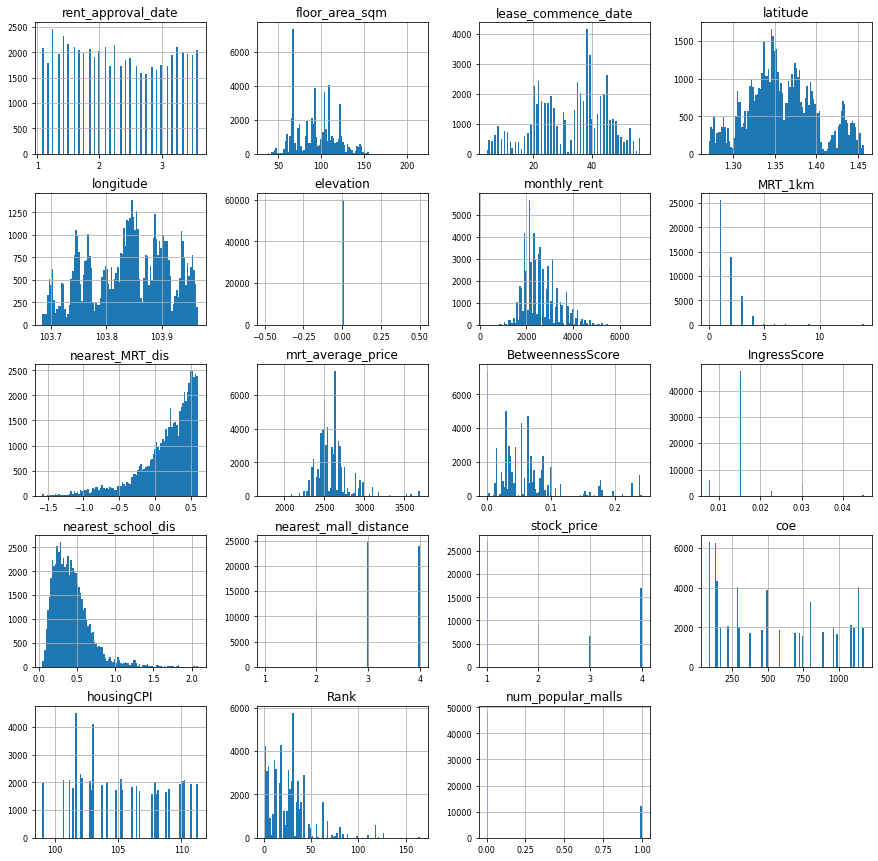

In [1652]:
X_train_num.hist(figsize=(15, 15), bins=100, xlabelsize=8, ylabelsize=8)

<AxesSubplot:>

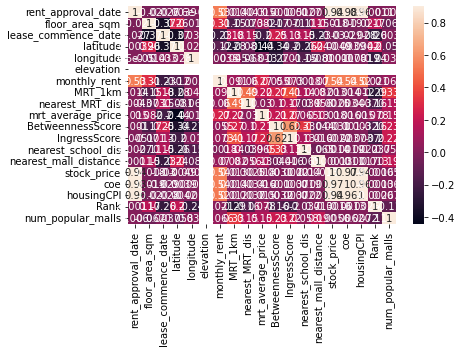

In [1653]:
corrmat = X_train_num.corr()
sns.heatmap(corrmat, vmax=.9, annot=True)

count    60000.000000
mean      2590.328333
std        714.910468
min        300.000000
25%       2100.000000
50%       2400.000000
75%       3000.000000
max       6950.000000
Name: monthly_rent, dtype: float64


<Figure size 432x288 with 0 Axes>

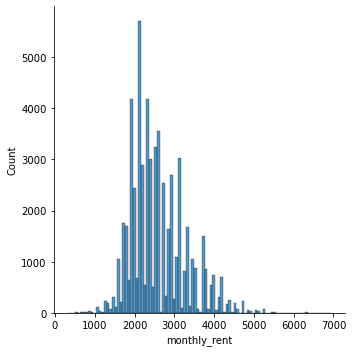

In [1654]:
y_train = train_data['monthly_rent']
print(y_train.describe())
plt.figure()
sns.displot(y_train, bins=100)

In [1655]:
def feature_engineering(data):
    # numerical feature
    data_num = data.select_dtypes(include = ['float64', 'int64'])
    data_num = data_num[['rent_approval_date', 'floor_area_sqm', 'lease_commence_date', 'mrt_average_price','nearest_MRT_dis',
                          'MRT_1km', 'BetweennessScore', 'nearest_school_dis', 'Rank', 'stock_price']] 
                            #'housingCPI' 'popular_mall' 'coe' , 'stock_price''close' 'nearest_mall_distance', 'num_popular_malls' 'mall_score'
    
    # data_num['stock_price'] = -data_num['stock_price']
    # categorical feature
    data_cat = data.select_dtypes(include = ['object'])
    data_cat_one_hot = pd.get_dummies(data[['region']]) #'flat_type' , 'planning_area', 'town', 'flat_model' 'region',

    data_cat_target = pd.DataFrame()

    # region_encoded = train_data.groupby('region')['monthly_rent'].mean()
    # data_cat_target['region_encoded'] = data['region'].map(region_encoded)

    town_encoded = train_data.groupby('town')['monthly_rent'].mean()
    data_cat_target['town_encoded'] = data['town'].map(town_encoded)
    
    planning_area_encoded = train_data.groupby('planning_area')['monthly_rent'].mean()
    data_cat_target['planning_area_encoded'] = data['planning_area'].map(planning_area_encoded)

    subzone_encoded = train_data.groupby('subzone')['monthly_rent'].mean()
    data_cat_target['subzone_encoded'] = data['subzone'].map(subzone_encoded)

    flat_model_encoded = train_data.groupby('flat_model')['monthly_rent'].mean()
    data_cat_target['flat_model_encoded'] = data['flat_model'].map(flat_model_encoded)

    flat_type_encoded = train_data.groupby('flat_type')['monthly_rent'].mean()
    data_cat_target['flat_type_encoded'] = data['flat_type'].map(flat_type_encoded)

    # block_encoded = train_data.groupby('block')['monthly_rent'].median().transform(lambda x: int(x / 1000) * 1000)
    # data_cat_target['block_encoded'] = data['block'].map(block_encoded)

    street_name_encoded = train_data.groupby('street_name')['monthly_rent'].mean()
    data_cat_target['street_name_encoded'] = data['street_name'].map(street_name_encoded)

    # nearest_mall_name_encoded = train_data.groupby('nearest_mall_name')['monthly_rent'].mean()
    # data_cat_target['nearest_mall_name_encoded'] = data['nearest_mall_name'].map(nearest_mall_name_encoded)

    # nearest_school_name_encoded = train_data.groupby('nearest_school_name')['monthly_rent'].mean()
    # data_cat_target['nearest_school_name_encoded'] = data['nearest_school_name'].map(nearest_school_name_encoded)

    # data_cat_target['town_encoded'] = train_data.groupby('town')['monthly_rent'].transform('mean')
    # data_cat_target['planning_area_encoded'] = train_data.groupby('planning_area')['monthly_rent'].transform('mean')
    # data_cat_target['block_encoded'] = train_data.groupby('block')['monthly_rent'].transform('mean')
    # data_cat_target['street_name_encoded'] = train_data.groupby('street_name')['monthly_rent'].transform('mean')

    # Concate all the choosed features
    # data_filter = pd.concat([data_num, data_cat_target], axis=1)
    data_filter = pd.concat([data_num, data_cat_one_hot, data_cat_target], axis=1)
    # data_filter['MRT_1km'] = np.sqrt(data_filter['MRT_1km'])
    return data_filter

X_train = feature_engineering(train_data)
X_train
    

,rent_approval_date,floor_area_sqm,lease_commence_date,mrt_average_price,nearest_MRT_dis,MRT_1km,BetweennessScore,nearest_school_dis,Rank,stock_price,...,region_east region,region_north east region,region_north region,region_west region,town_encoded,planning_area_encoded,subzone_encoded,flat_model_encoded,flat_type_encoded,street_name_encoded
0,1.750000,67.0,40,2481.346424,0.200699,1.0,0.113921,0.334495,43,1,...,False,False,False,True,2595.146199,2595.146199,2542.158516,2369.965462,2276.033233,2312.179487
1,2.416667,92.0,45,2425.980392,0.000923,1.0,0.071613,0.605547,17,2,...,True,False,False,False,2438.227223,2438.227223,2360.371046,2369.965462,2692.359176,2404.212860
2,2.833333,67.0,52,2632.947462,0.518801,4.0,0.023996,0.426187,11,3,...,False,False,False,False,2516.680515,2516.680515,2808.893871,2636.211052,2276.033233,2403.464419
3,1.666667,149.0,30,2687.550471,-0.647366,0.0,0.000000,0.562392,74,1,...,True,False,False,False,2686.857477,2686.857477,2610.338573,2878.725962,2892.857143,2757.834101
4,2.916667,68.0,51,2589.985486,0.487930,3.0,0.037886,0.271506,23,4,...,False,False,False,False,2665.537634,2702.635659,2793.525180,2636.211052,2276.033233,2395.744681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1.750000,67.0,44,2461.518550,0.231013,1.0,0.087947,0.361006,2,1,...,False,True,False,False,2416.700057,2416.700057,2390.887097,2369.965462,2276.033233,2336.012658
59996,3.333333,83.0,4,2881.436907,0.279747,2.0,0.069577,0.562558,27,4,...,False,False,False,False,2904.113924,2904.113924,2694.936709,2612.031305,2692.359176,3400.000000
59997,2.500000,122.0,35,2643.672840,0.176264,2.0,0.030273,0.318659,5,2,...,True,False,False,False,2638.489123,2638.489123,2602.823315,2636.211052,2815.593875,2509.600000
59998,3.083333,123.0,46,2425.980392,-0.018778,1.0,0.071613,0.219191,17,4,...,True,False,False,False,2438.227223,2438.227223,2434.379786,2444.223986,2815.593875,2591.447368


## Start to train

### Training preparation

#### Train-Test Split

In [1656]:
X, y = X_train, y_train
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Define evaluation metrics

In [1657]:
# def rmse_cv(model):
#     rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
#     return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    r_squared = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))

    
    print("MAE:", mae)
    print("R2 Score:", r_squared)
    print("MSE:", mse)
    print("RMSE:", rmse)
    

### Linear Models

#### Linear Regression(Ordinary Least Squares)

In [257]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 391.2247332752565
R2 Score: 0.4934180808372649
MSE: 255558.40293452956
RMSE: 505.52784585473586


#### Ridge Regression

In [870]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

evaluation(y_test, predictions)

MAE: 398.7439469219966
R2 Score: 0.4737315108081247
MSE: 265489.80436358385
RMSE: 515.257027476175


#### Lasso Regression

In [871]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

evaluation(y_test, predictions)

MAE: 399.80348268392635
R2 Score: 0.47096319202306414
MSE: 266886.3546563638
RMSE: 516.6104476840976


#### Elastic-Net Regression

In [787]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

evaluation(y_test, predictions)

MAE: 389.4265070575709
R2 Score: 0.4941465959922131
MSE: 255190.8845481255
RMSE: 505.1642154271475


#### Stochastic Gradient Descent - SGD

In [786]:
scaler = StandardScaler()
X_train_sgd = scaler.fit_transform(X_train)
X_test_sgd = scaler.transform(X_test)

sgd = SGDRegressor(loss="epsilon_insensitive")
sgd.fit(X_train_sgd, y_train)
predictions = sgd.predict(X_test_sgd)

evaluation(y_test, predictions)

MAE: 387.65355693896896
R2 Score: 0.49360046388872436
MSE: 255466.39506849606
RMSE: 505.4368358840658


#### Polynomial regression

In [874]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

evaluation(y_test, predictions)

MAE: 377.17148761391064
R2 Score: 0.4852377075686024
MSE: 259685.20463997324
RMSE: 509.5931756214689


### Support Vector Machines

#### Support Vector Regression

In [875]:
svr = SVR(C=200000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

evaluation(y_test, predictions)

MAE: 425.2541070590775
R2 Score: 0.38444354209055087
MSE: 310533.43861812825
RMSE: 557.2552724004756


### Nearest Neighbors

#### Nearest Neighbors Regression

In [785]:
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_test_nn = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=50)
knn_reg.fit(X_train_nn, y_train)
predictions = knn_reg.predict(X_test_nn)

evaluation(y_test, predictions)

MAE: 377.5491666666667
R2 Score: 0.5072126023429101
MSE: 248599.398375
RMSE: 498.5974311756931


### Decision Tree

#### DecisionTreeRegressor

In [781]:
tree_reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=50)
tree_reg.fit(X_train, y_train)
predictions = tree_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 377.3479559794293
R2 Score: 0.5063001333375527
MSE: 249059.71705775484
RMSE: 499.0588312591561


### Ensemble Methods

#### Gradient-boosted trees

In [1317]:
hist_reg = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.01)
hist_reg.fit(X_train, y_train)
predictions = hist_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 364.30898354645166
R2 Score: 0.5405020142158773
MSE: 231805.69016893918
RMSE: 481.4620339849646


#### Random Forest

In [879]:
random_forest = RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,min_samples_leaf=5,max_features=None,oob_score=True)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

evaluation(y_test, predictions)

MAE: 372.15984447442816
R2 Score: 0.516109992133573
MSE: 244110.87906711415
RMSE: 494.07578271669433


#### BaggingRegressor

In [788]:
bag_reg = BaggingRegressor(n_estimators=100)
bag_reg.fit(X_train, y_train)
predictions = bag_reg.predict(X_test)

evaluation(y_test, predictions)

KeyboardInterrupt: 

#### AdaBoost Regressor

In [535]:
base_reg = LinearRegression()
ada_reg = AdaBoostRegressor(base_estimator=base_reg, n_estimators=1000)
ada_reg.fit(X_train, y_train)
predictions = ada_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 401.745205978806
R2 Score: 0.4728890789786009
MSE: 265914.790974417
RMSE: 515.6692651054715


#### XGBoost Regressor

In [1658]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

evaluation(y_test, predictions)

MAE: 362.96983488972984
R2 Score: 0.5416622071584731
MSE: 231220.40071369032
RMSE: 480.8538246844776


#### Voting Regressor(Blend different regressors)

In [1228]:
voting_reg = VotingRegressor(estimators=[('hist', hist_reg), ('xgb', xgb)])
voting_reg.fit(X_train, y_train)
predictions = voting_reg.predict(X_test)

evaluation(y_test, predictions)


MAE: 363.0181489975715
R2 Score: 0.5423391195904533
MSE: 230878.91466079422
RMSE: 480.4986104670795


### Neural network models (supervised)

#### MLP Regressor

In [884]:
mlp_reg = MLPRegressor(learning_rate='adaptive')
mlp_reg.fit(X_train, y_train)
predictions = mlp_reg.predict(X_test)

evaluation(y_test, predictions)

MAE: 397.4640958572571
R2 Score: 0.4641659851193336
MSE: 270315.38217397424
RMSE: 519.9186303393775


### Blend methods

In [1318]:
def blended_pred(x):
    return 0.6 * xgb.predict(x) + 0.4 * hist_reg.predict(x) # + 0.05 * ada_reg.predict(x)


evaluation(y_test, blended_pred(X_test))

MAE: 363.00073544967205
R2 Score: 0.5420741205278694
MSE: 231012.6003188316
RMSE: 480.637701724315


## Predict on test data

Predicet test dataset

In [1319]:
test_data = data_preprocessing(test_data)
test_data = feature_engineering(test_data)

test_data

1


,rent_approval_date,floor_area_sqm,lease_commence_date,mrt_average_price,nearest_MRT_dis,MRT_1km,BetweennessScore,nearest_school_dis,Rank,stock_price,...,region_east region,region_north east region,region_north region,region_west region,town_encoded,planning_area_encoded,subzone_encoded,flat_model_encoded,flat_type_encoded,street_name_encoded
0,3.083333,121.0,39,2529.932302,0.078970,1.0,0.058783,0.149696,14,0.879434,...,False,True,False,False,2503.252886,2503.252886,2427.604167,2636.211052,2815.593875,2335.714286
1,2.750000,100.0,24,2531.304665,0.593808,1.0,0.036996,0.142556,34,0.939112,...,False,False,True,False,2540.491010,2540.491010,2592.332790,2612.031305,2692.359176,2658.333333
2,3.583333,91.0,43,2636.174071,-0.192259,0.0,0.064555,1.037485,4,0.872507,...,False,False,False,True,2646.808979,2646.808979,2395.588235,2369.965462,2692.359176,2532.195122
3,1.666667,74.0,37,2481.346424,0.538309,1.0,0.113921,1.076121,19,1.112088,...,False,False,False,True,2595.146199,2595.146199,2400.150150,2612.031305,2276.033233,2781.756757
4,2.250000,121.0,40,2481.346424,0.452393,1.0,0.113921,0.714777,19,1.058997,...,False,False,False,True,2595.146199,2595.146199,2400.150150,2636.211052,2815.593875,2268.564356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.666667,92.0,11,2666.429094,0.024699,1.0,0.000000,0.168533,32,0.966835,...,False,True,False,False,2665.555556,2665.555556,2654.294479,2612.031305,2692.359176,2601.399491
29996,3.166667,90.0,19,2531.304665,0.071360,1.0,0.036996,0.231490,34,0.881708,...,False,False,True,False,2540.491010,2540.491010,2473.678647,2612.031305,2692.359176,2426.102941
29997,3.416667,68.0,43,2461.518550,0.356386,1.0,0.087947,0.181335,36,0.891750,...,False,True,False,False,2416.700057,2416.700057,2378.606965,2369.965462,2276.033233,2299.616368
29998,3.166667,144.0,25,2502.786033,0.457365,1.0,0.034974,0.292592,37,0.881708,...,False,False,True,False,2466.298251,2466.298251,2497.040971,2978.033473,2892.857143,2513.400000


In [1320]:
test_data = test_data.reindex(columns=X_train.columns, fill_value=False)

test_data

,rent_approval_date,floor_area_sqm,lease_commence_date,mrt_average_price,nearest_MRT_dis,MRT_1km,BetweennessScore,nearest_school_dis,Rank,stock_price,...,region_east region,region_north east region,region_north region,region_west region,town_encoded,planning_area_encoded,subzone_encoded,flat_model_encoded,flat_type_encoded,street_name_encoded
0,3.083333,121.0,39,2529.932302,0.078970,1.0,0.058783,0.149696,14,0.879434,...,False,True,False,False,2503.252886,2503.252886,2427.604167,2636.211052,2815.593875,2335.714286
1,2.750000,100.0,24,2531.304665,0.593808,1.0,0.036996,0.142556,34,0.939112,...,False,False,True,False,2540.491010,2540.491010,2592.332790,2612.031305,2692.359176,2658.333333
2,3.583333,91.0,43,2636.174071,-0.192259,0.0,0.064555,1.037485,4,0.872507,...,False,False,False,True,2646.808979,2646.808979,2395.588235,2369.965462,2692.359176,2532.195122
3,1.666667,74.0,37,2481.346424,0.538309,1.0,0.113921,1.076121,19,1.112088,...,False,False,False,True,2595.146199,2595.146199,2400.150150,2612.031305,2276.033233,2781.756757
4,2.250000,121.0,40,2481.346424,0.452393,1.0,0.113921,0.714777,19,1.058997,...,False,False,False,True,2595.146199,2595.146199,2400.150150,2636.211052,2815.593875,2268.564356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.666667,92.0,11,2666.429094,0.024699,1.0,0.000000,0.168533,32,0.966835,...,False,True,False,False,2665.555556,2665.555556,2654.294479,2612.031305,2692.359176,2601.399491
29996,3.166667,90.0,19,2531.304665,0.071360,1.0,0.036996,0.231490,34,0.881708,...,False,False,True,False,2540.491010,2540.491010,2473.678647,2612.031305,2692.359176,2426.102941
29997,3.416667,68.0,43,2461.518550,0.356386,1.0,0.087947,0.181335,36,0.891750,...,False,True,False,False,2416.700057,2416.700057,2378.606965,2369.965462,2276.033233,2299.616368
29998,3.166667,144.0,25,2502.786033,0.457365,1.0,0.034974,0.292592,37,0.881708,...,False,False,True,False,2466.298251,2466.298251,2497.040971,2978.033473,2892.857143,2513.400000


In [1321]:
# best_model = voting_reg
# test_pred = best_model.predict(test_data)

test_pred = blended_pred(test_data)
test_pred

array([3186.46095088, 2807.88250378, 3392.35139716, ..., 2605.74246288,
       3259.32535931, 3490.10498423])

In [1322]:
sample_submission_path = './Datasets/example-submission.csv'
sample_submission_df = pd.read_csv(sample_submission_path)
sample_submission_df['Predicted'] = test_pred
sample_submission_df.to_csv('./Datasets/submission.csv', index=False)
sample_submission_df.head()

,Id,Predicted
0,0,3186.460951
1,1,2807.882504
2,2,3392.351397
3,3,2082.009092
4,4,2590.628773
